In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ir = pd.read_csv("iris2.csv")

In [3]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,2.7,3.9,1.2,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica


In [5]:
ir.shape 

(150, 5)

In [6]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ir["class"] = ir["class"].astype("category")

In [8]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [9]:
ir.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Univariate Analysis

In [10]:
import random

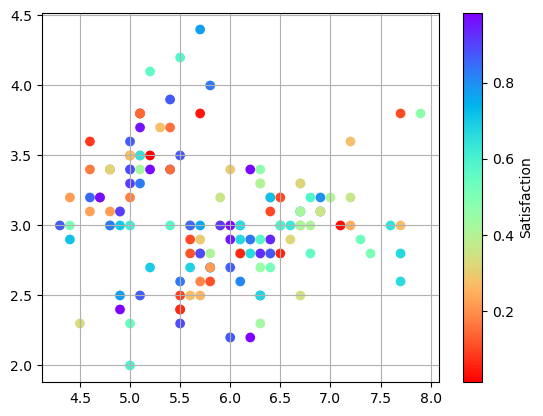

In [11]:
plt.scatter(ir["sepal_length"], ir["sepal_width"], cmap = "rainbow_r", c = [random.random() for _ in range(150)])
cbar = plt.colorbar()
cbar.set_label("Satisfaction")
plt.grid(True)

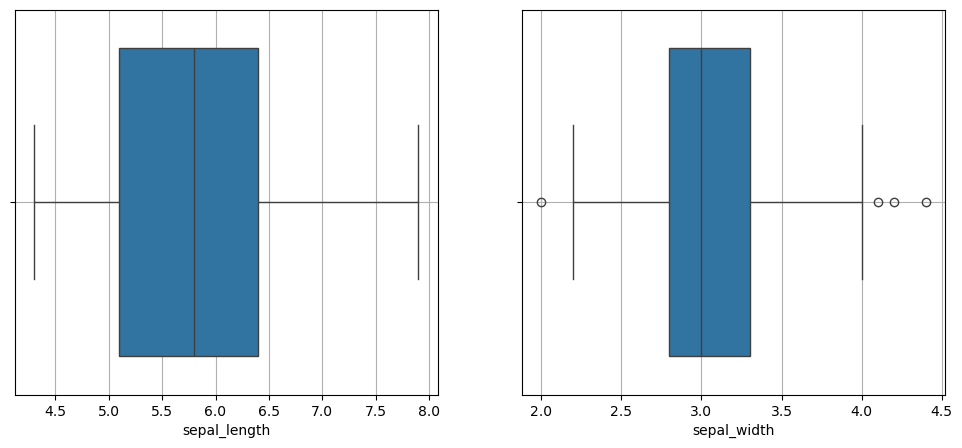

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(x = "sepal_length", data = ir, ax = ax[0])
ax[0].grid(True)


sns.boxplot(x = "sepal_width", data = ir, ax = ax[1])
ax[1].grid(True)

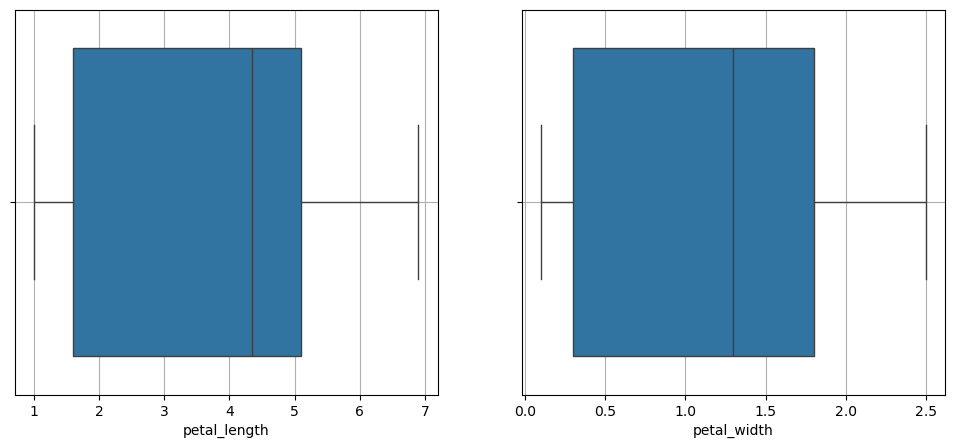

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

sns.boxplot(x = "petal_length", data = ir, ax = ax1)
ax1.grid(True)

sns.boxplot(x = "petal_width", data = ir, ax = ax2)
ax2.grid(True)

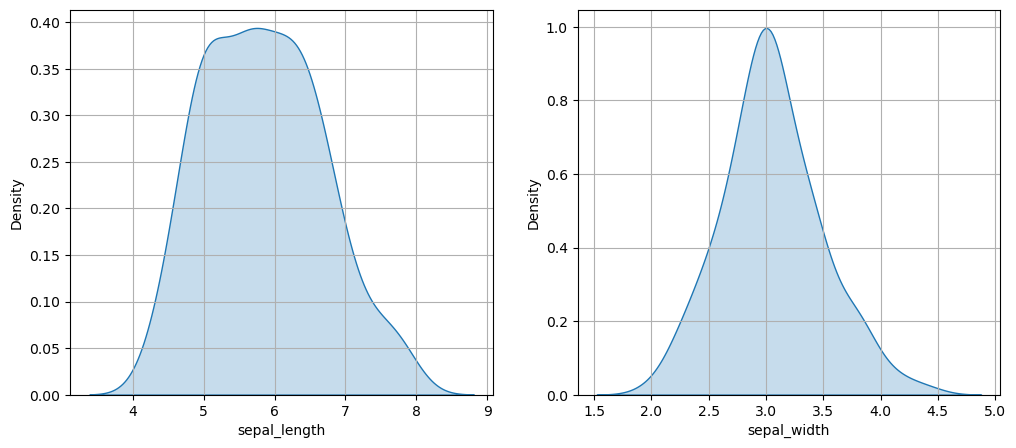

In [14]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.kdeplot(x = "sepal_length", data = ir, ax = ax[0], fill = True)
ax[0].grid(True)


sns.kdeplot(x = "sepal_width", data = ir, ax = ax[1], fill = True)
ax[1].grid(True)

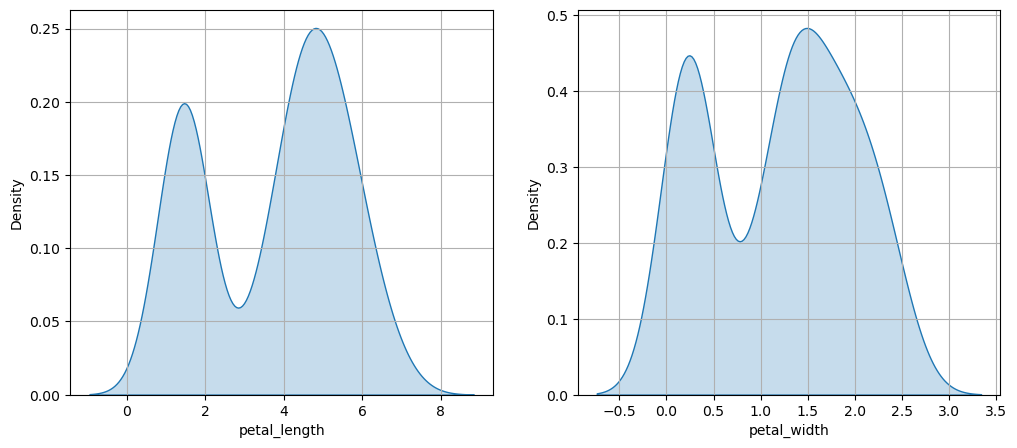

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.kdeplot(x = "petal_length", data = ir, ax = ax[0], fill = True)
ax[0].grid(True)


sns.kdeplot(x = "petal_width", data = ir, ax = ax[1], fill = True)
ax[1].grid(True)

## Multivariate Analysis

In [16]:
x = ir.drop(columns = "class").corr()
x

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

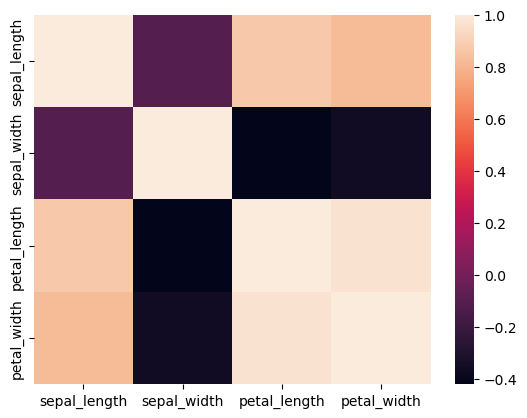

In [17]:
sns.heatmap(x)

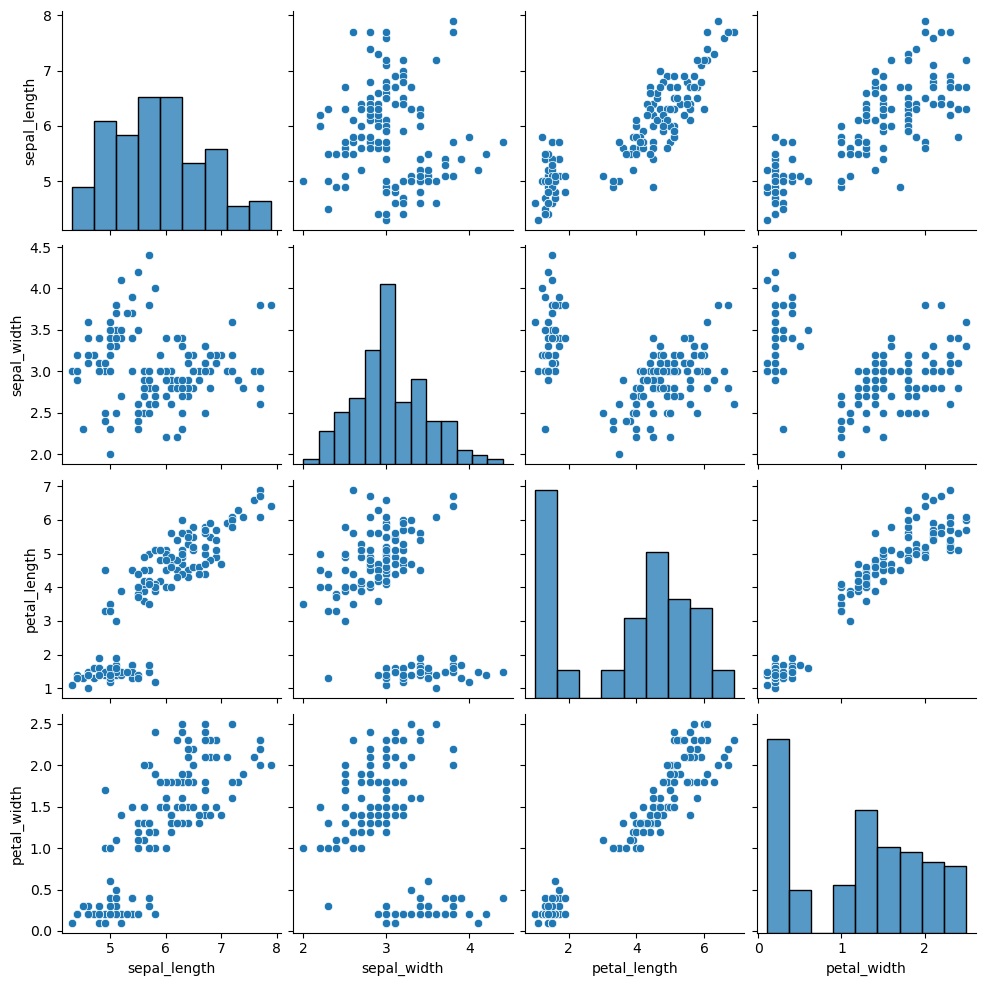

In [18]:
sns.pairplot(ir)

## SVM and Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ir.drop(columns = ["class"]) ,
                                                            ir["class"] ,
                                                            test_size = 0.1,
                                                            random_state = 42) 

In [20]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
56,6.3,3.3,4.7,1.6
104,6.5,3.0,5.8,2.2
69,5.6,2.5,3.9,1.1
55,5.7,2.8,4.5,1.3
132,6.4,2.8,5.6,2.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [21]:
y_train

56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: class, Length: 135, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.56195149,  0.56791065,  0.51776964,  0.51036026],
       [ 0.80278784, -0.12487192,  1.14441016,  1.30078436],
       [-0.28097574, -1.27950953,  0.06203108, -0.1483265 ],
       [-0.16055757, -0.58672696,  0.403835  ,  0.1151482 ],
       [ 0.68236966, -0.58672696,  1.03047552,  1.30078436],
       [-1.36473933,  0.33698312, -1.24821727, -1.33396266],
       [ 0.32111514, -0.12487192,  0.63170428,  0.77383496],
       [-1.0034848 ,  0.79883817, -1.24821727, -1.07048796],
       [ 0.68236966, -0.58672696,  1.03047552,  1.16904701],
       [ 2.4886423 ,  1.72254825,  1.48621408,  1.03730966],
       [ 1.04362419, -0.12487192,  0.80260624,  1.43252172],
       [ 1.04362419, -1.27950953,  1.14441016,  0.77383496],
       [ 1.16404237,  0.33698312,  1.20137748,  1.43252172],
       [-1.24432115, -0.12487192, -1.36215191, -1.20222531],
       [-1.24432115,  0.1060556 , -1.24821727, -1.33396266],
       [-1.4851575 ,  1.26069321, -1.59002119, -1.33396266],
       [-0.16055757,  3.

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [26]:
from sklearn.svm import SVC

SVM = SVC()

In [27]:
SVM.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
y_pred = SVM.predict(X_test_scaled)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



<Figure size 800x800 with 0 Axes>

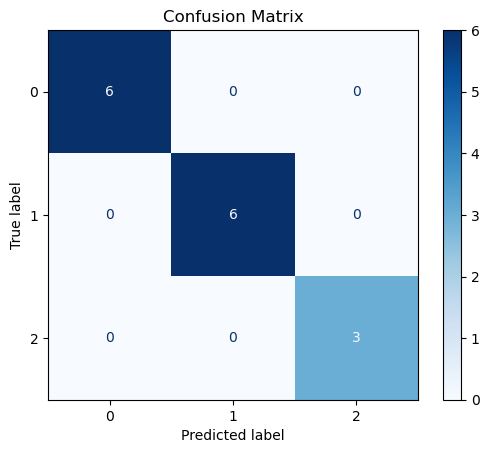

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Cross Validation 

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pandas as pd

X_raw = pd.concat([X_train, X_test])
y_raw = pd.concat([y_train, y_test])

pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

scores = cross_val_score(pipeline, X_raw, y_raw, cv=10)

print(f"Accuracy for each run: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")

Accuracy for each run: [1.         1.         0.93333333 1.         0.86666667 0.93333333
 1.         1.         1.         0.93333333]
Average Accuracy: 0.9667
